# Churn in Telecom

#### Dataset taken from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

In [170]:
from __future__ import print_function
import numpy as np
import pandas as pd
from plotUtils import *
%reload_ext autoreload
%autoreload 2

In [171]:
df = pd.read_csv("./bigml_churn.csv", low_memory=False)

In [172]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [173]:
df.shape

(3333, 21)

In [174]:
df.columns

Index([u'state', u'account length', u'area code', u'phone number',
       u'international plan', u'voice mail plan', u'number vmail messages',
       u'total day minutes', u'total day calls', u'total day charge',
       u'total eve minutes', u'total eve calls', u'total eve charge',
       u'total night minutes', u'total night calls', u'total night charge',
       u'total intl minutes', u'total intl calls', u'total intl charge',
       u'customer service calls', u'churn'],
      dtype='object')

## Calculating churn by state

In [175]:
churn = df['churn'].value_counts()
churn

False    2850
True      483
Name: churn, dtype: int64

In [176]:
barPlot(churn, xcat=True)

In [177]:
def calcChurn(x):
    return x[x==True].count()*100.0/x.count()

In [178]:
pctgChurnByState = df.groupby('state')['churn'].apply(
    lambda x: calcChurn(x)).sort_values(ascending=False)[:10]

In [179]:
pctgChurnByState

state
CA    26.470588
NJ    26.470588
TX    25.000000
MD    24.285714
SC    23.333333
MI    21.917808
MS    21.538462
NV    21.212121
WA    21.212121
ME    20.967742
Name: churn, dtype: float64

## Let's plot churn % by State - Top 'n' states

In [180]:
barPlot(pctgChurnByState, title='Churn by State', xaxis="State", yaxis="% Churn", xcat=True)

## Churn by Area Code

In [181]:
pctgChurnByAreaCode = df.groupby('area code')['churn'].apply(
    lambda x: calcChurn(x)).sort_values(ascending=False)[:10]

In [182]:
pctgChurnByAreaCode

area code
510    14.880952
408    14.558473
415    14.259819
Name: churn, dtype: float64

In [183]:
barPlotY(pctgChurnByAreaCode, title='Churn by Area Code', 
          xaxis="Area Code", yaxis="%Churn", xcat=True)

## Churn by International Plan

In [184]:
pctgByIntlPlan = df.groupby(['international plan'])['churn'].apply(lambda x: calcChurn(x))

In [185]:
barPlot(pctgByIntlPlan, title='International Plan vs Churn', 
        xaxis="International Plan", yaxis="% Churn", xcat=True)

## Voicemail plans

In [186]:
pctgByVMPlan = df.groupby(['voice mail plan'])['churn'].apply(lambda x: calcChurn(x))

In [187]:
barPlot(pctgByVMPlan, title='VoiceMail Plan vs Churn', 
        xaxis="VoiceMail Plan", yaxis="% Churn", xcat=True)

## Customer Service Calls

In [188]:
groupedBoxPlot(df, col='customer service calls', byCol='churn',
               title = 'Customer service calls', yaxis='No of calls')

## Total Day Minutes

In [189]:
groupedBoxPlot(df, col='total day minutes', byCol='churn',
               title = 'Churn by total day minutes')

## Total Day Charge

In [190]:
groupedBoxPlot(df, col='total day charge', byCol='churn',
               title = 'Churn by total Day Charge')

In [191]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

## Convert state column from categorical to numeric

In [192]:
df = pd.concat([df, pd.get_dummies(df['state'])], axis=1)
df.drop('state', axis=1, inplace=True)

## Drop unnecessary columns and convert boolean to numeric

In [193]:
df.drop('phone number', axis=1, inplace=True)
df['international plan'] = df['international plan'].apply(lambda x: 1 if x=='yes' else 0)
df['voice mail plan'] = df['voice mail plan'].apply(lambda x: 1 if x=='yes' else 0)
df['churn'] = df['churn'].apply(lambda x: 1 if x==True else 0)

In [194]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


## Time to build the model - define our X and y variables

In [195]:
from sklearn.cross_validation import train_test_split
y = df['churn']
X = df.drop(['churn'], axis=1)

## Create train-test validation split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Now create a classifier model and train it with training data

In [197]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Let's predict using the unseen (test) data

In [198]:
y_pred = model.predict(X_test)

## Let's test the quality of our predictions

In [199]:
from sklearn.metrics import confusion_matrix
print_cm(cm=confusion_matrix(y_pred, y_test), labels=['No', 'Yes'])

     t/p     No   Yes 
       No 718.0  38.0 
      Yes   4.0  74.0 


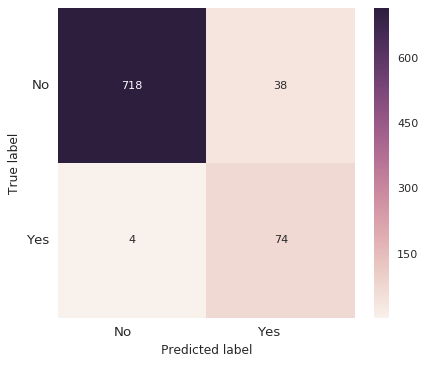

In [200]:
print_confusion_matrix(confusion_matrix(y_pred, y_test), class_names=['No', 'Yes'])
plt.show()

In [201]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.roc_auc_score(y_true=y_test, y_score=y_pred)

0.8275870597546497

In [202]:
fimp = model.feature_importances_
fimpIndex = fimp.argsort()[::-1]
zip(X.columns[fimpIndex], fimp[fimpIndex])[:10]

[('total day charge', 0.13071895598610148),
 ('total day minutes', 0.1237384189343664),
 ('customer service calls', 0.10216379216301426),
 ('international plan', 0.06682379340794606),
 ('total eve minutes', 0.055333644010245875),
 ('total eve charge', 0.052262585392973106),
 ('total intl calls', 0.0411690762460408),
 ('total intl minutes', 0.040154454930108566),
 ('total intl charge', 0.039329275648989685),
 ('total night minutes', 0.03838015928802603)]